## Data science project - Water quality

In this project, I will analyse and manipulate a dataset available on Kaggle [at this link](https://www.kaggle.com/datasets/adityakadiwal/water-potability).<br>
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.<br>
The aim of the project is to classify water quality

### Table of Contents

* 1. [Import and introductory study of data](#1)
   * [1.1. Data import and control](#2)
   * [1.2. Explanation of features](#3)
   * [1.3. Cataloguing of features](#4)

* 2. [Exploratory Data Analysis (EDA)](#5)
   * [2.1.Handling missing values](#6)
   * [2.2.Analysis of target distribution (potability): dataset rebalancing](#7)
   * [2.3. Outliers detection](#8)
   * [2.4. Study of distributions and correlations between features](#9)
   * [2.5. T-test water quality](#10)
   * [2.6. Preprocessing: Scaling, Rebalancing and Features selection](#11)
   * [2.7. Choose of proper metric](#12)

* 3. [Machine Learning: creation of the predictive model](#13)
   * [3.1. Method 1: spot check using all features for  the predictions](#14)
       * [3.1.1. Hyperparameter tuning](#15)
   * [3.2. Method 2: spot check using the most relevant features for  the predictions](#16)
       * [3.2.1. Hyperparameters tuning](#17)

* 4. [Conclusions: Choice of the model](#18)

<a id="1"> </a>
### 1.Import and introductory study of data

<a id="2"> </a>
#### 1.1. Data import and control

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#setting the style of graphs
sns.set(style="darkgrid")

#I always prefer to see all columns
pd.set_option("display.max_columns", None)

In [2]:
#loading the dataset
na_vals=["NA","Missing", "NaN", "None"]
df = pd.read_csv("../input/water-potability/water_potability.csv", na_values=na_vals)
df.head() #take a look at the first 5 lines to get familiar with the dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
print("Shape: {} \n".format(df.shape)) #check the number of rows and columns
df.info() #check features type and missing values

Shape: (3276, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


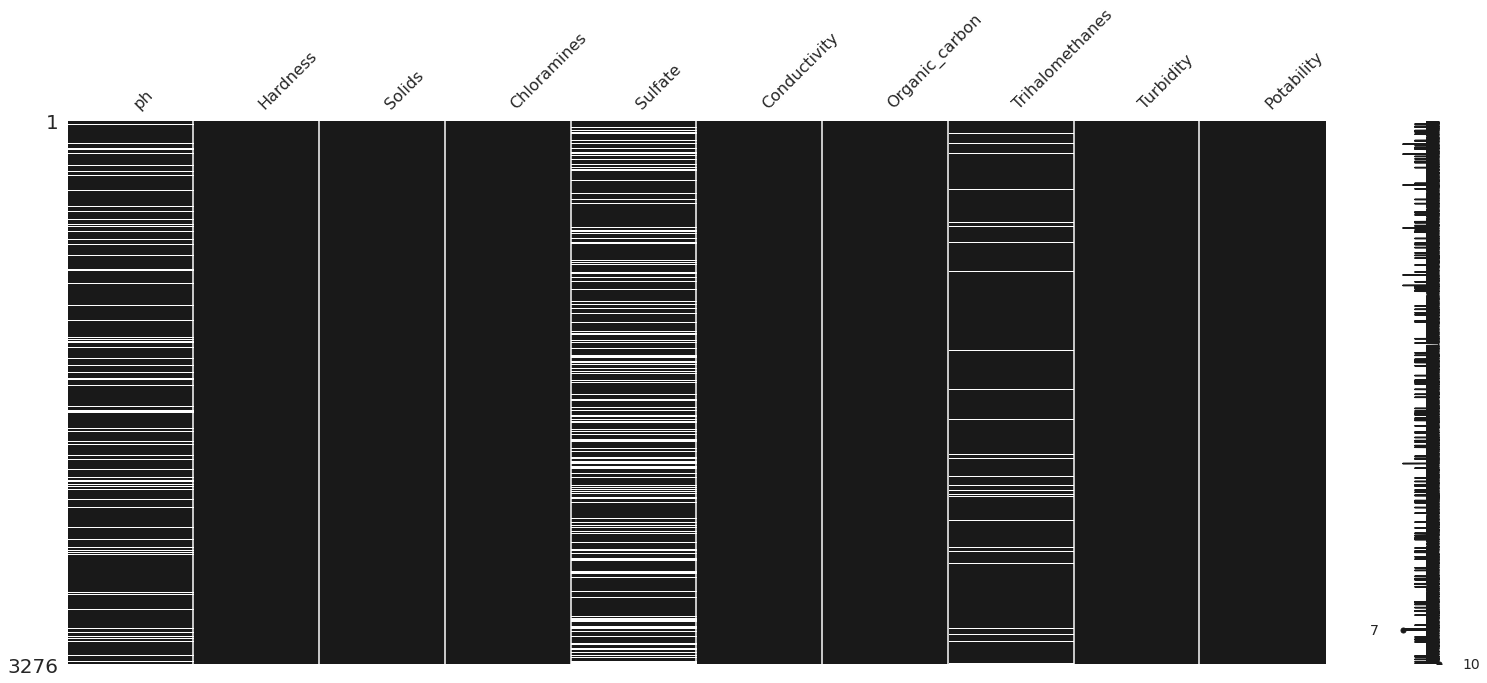

In [4]:
# graphic check of missing values
# df.isnull().sum().any()
msno.matrix(df, color=" 0.1")
plt.show()

The missing values are concentrated in 3 features: pH, Sulftate and Trihalomethanes.

<a id="3"> </a>
#### 1.2. Explanation of features

* pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards - continuos numeric
* Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium - continuos numeric                                          
* Solids: (Total dissolved solids - TDS)Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose - continuos numeric                                       
* Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water - continuos numeric                                 
* Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations - continuos numeric                                  
* Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm - continuos numeric                                 
* Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment - continuos numeric 
* Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water - continuos numeric                           
* Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU - continuos numeric
* Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable - nominal categorical value (output target) <br>

There are missing values that I will try to manage and  the type of each feature is consistent with the values it contains.<br>
I have to pay attention to one thing: although the target features are of type "int64", the output variable is actually nominal categorical as it does not represent real numerical values (1 means Potable and 0 means Not potable). <br>
The other variables are truly numeric (continuos numeric) features.

In [5]:
#dataset description
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


There is a great variation between the numbers, in terms of orders of magnitude: we just need to look at the mean values to realize this. We will need to scale the features.<br>
The average value of 'fetal_healt' (the class column) is 0.39, which tells me that on average the values ​​are more in the reference class 0, but, for a better understanding of the distribution of the classes, later we'll make a histogram (this will even help us on checking the balance between the classes).

The handling of the missing values, the check on the outliers and the balancing of the dataset  will be made in the complete dataset (without splitting into "train" and "test" set).

<a id="4"> </a>
#### 1.3. Cataloguing of features

In [6]:
#create lists for each type of feature to study their correlations

#continuos numerical features:
num = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
       "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]

#ordinal categorical features:
cat_nom=[]
for i in df.columns:
    if i not in num and df[i].dtype == "int64":
        cat_nom.append(i)
        
print("Continuos numerical features:\n{} \nTot: {}".format(num,len(num)))
print("Nominal categorical features:\n{}\nTot: {}".format(cat_nom,len(cat_nom)))

Continuos numerical features:
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'] 
Tot: 9
Nominal categorical features:
['Potability']
Tot: 1


<a id="5"> </a>
### 2. Exploratory Data Analysis (EDA)

<a id="6"> </a>
#### 2.1.Handling missing values

In order to handle missing values I decide to use a mutlivariate approach in which more than one feature is taken into consideration. There are two ways to impute missing values considering the multivariate approach. Using KNNImputer or IterativeImputer classes. I follow the second method. <br>
This model actually builds a regression model with features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer(random_state=42, initial_strategy="median")
imputed = impute_it.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190926,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837030,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983226,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


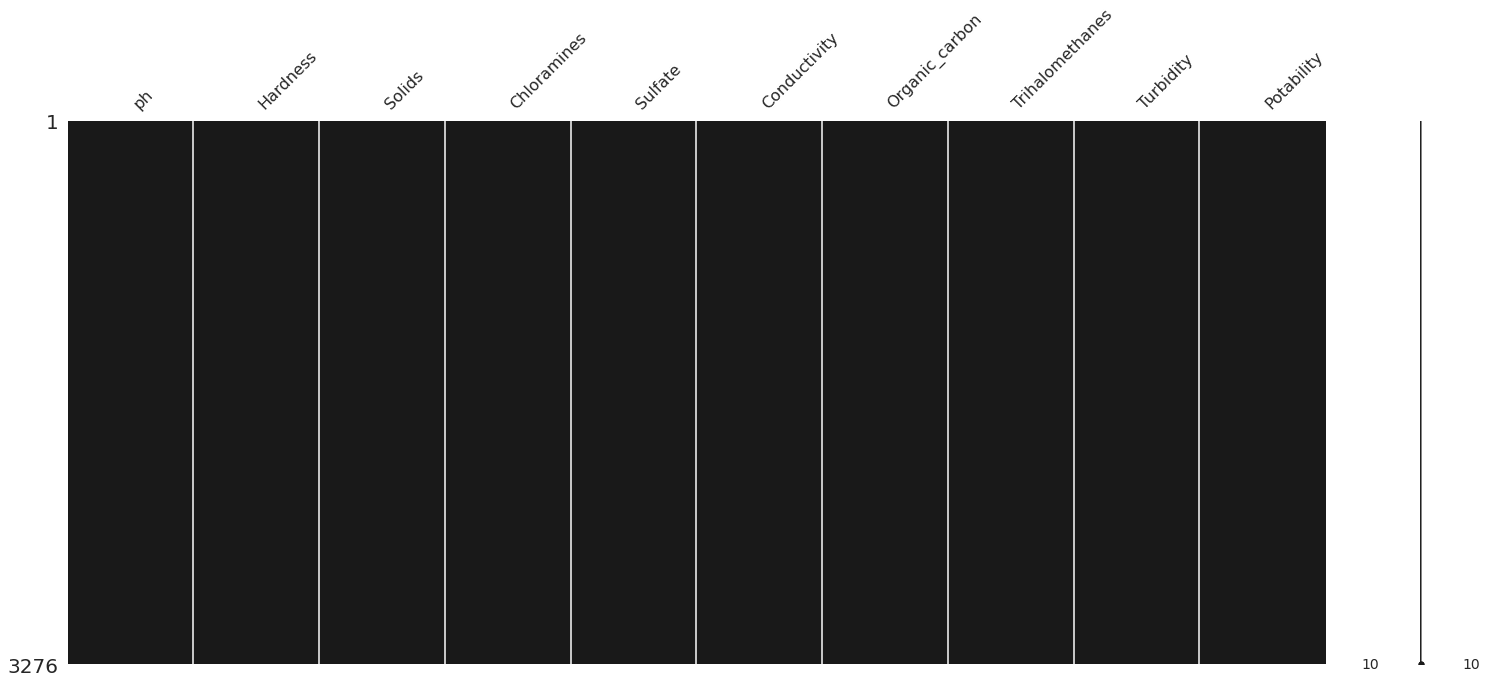

In [8]:
msno.matrix(df_imputed, color=" 0.1")
plt.show()

Now we don't have other missing values

<a id="7"> </a>
#### 2.2.Analysis of target distribution (potability): dataset rebalancing?

In [9]:
d= pd.DataFrame(df_imputed['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=["red", "blue"],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='We can resample the data<br> to get a balanced dataset',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Water potability',x=0.47,y=0.98,
               font=dict(color= "black",size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

This is a classification problem with 2 classes. The dataset, however, is not balanced.<br>
So, I try to rebalance it while doing train test split by oversampling the minority class only on the training set

<a id="8"> </a>
#### 2.3. Outliers detection

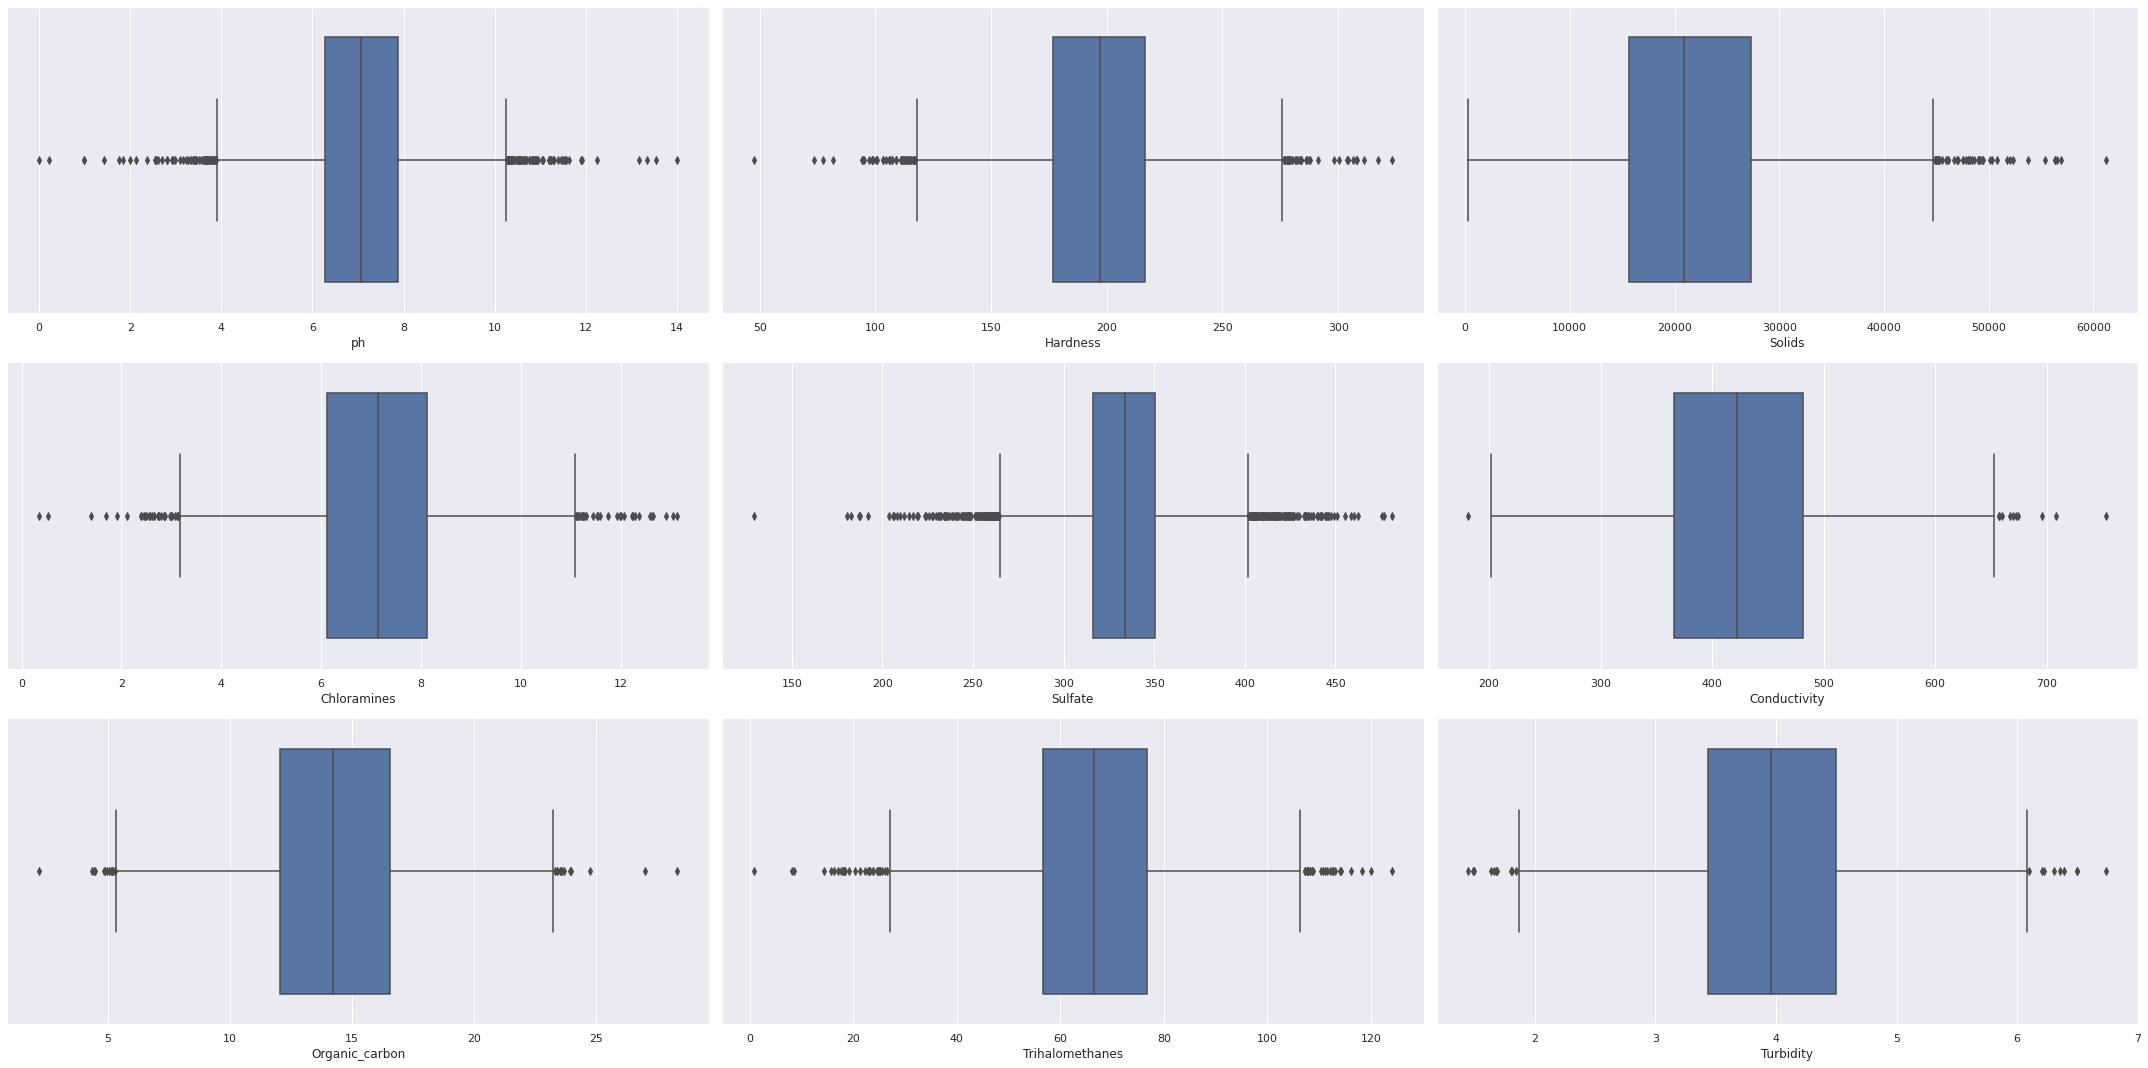

In [10]:
#drawing boxplots of the  numerical features in order to see ouliers

i = 1
plt.figure(figsize=(30,15))
for feature in num:
    plt.subplot(3,3,i)
    sns.boxplot(data=df_imputed, x=feature)
    plt.tight_layout()
    i+=1

I use one-class Svm for outliers detection on the whole dataset. <br>
The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.<br>
When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.<br>
The scikit-learn library provides an implementation of one-class SVM in the OneClassSVM class.
The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset.

In [11]:
#import library
from sklearn.svm import OneClassSVM
# identify outliers 
OcSVM = OneClassSVM(nu=0.05)
y_outliers = OcSVM.fit_predict(df_imputed)

#Find score and anomaly value
df_imputed['scores']= OcSVM.decision_function(df_imputed)
df_imputed['anomaly_Value']= y_outliers
df_imputed.head(10) #After adding the scores and anomalies for all the rows in the complete dataset, it will print the predicted anomalies.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,scores,anomaly_Value
0,7.190926,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0,0.899317,1
1,3.716080,129.422921,18630.057858,6.635246,344.837030,592.885359,15.180013,56.329076,4.500656,0.0,1.479451,1
2,8.099124,224.236259,19909.541732,9.275884,331.983226,418.606213,16.868637,66.420093,3.055934,0.0,1.137020,1
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0,0.601896,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0,1.657273,1
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0.0,0.069792,1
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0.0,0.069076,1
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0.0,2.359632,1
8,6.928043,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0.0,2.332532,1
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0.0,0.054447,1


To show the predicted anomalies outliers present in the dataset , data need to be analyzed after the addition of scores and anomaly columns. Note that the anomaly column values would be -1 and the corresponding scores will be negative.

In [12]:
df_imputed[df_imputed["anomaly_Value"]== -1] # tables with the predicted outliers

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,scores,anomaly_Value
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891,0.0,-0.651001,-1
119,7.812804,196.583886,42550.841816,7.334648,316.393136,442.545775,14.666917,66.043557,6.204846,0.0,-0.130698,-1
123,7.521052,267.059647,26865.373741,10.449450,320.155756,505.709372,16.237746,57.037780,2.880785,0.0,-0.000133,-1
142,6.825468,187.051710,46140.126850,6.137757,352.702182,373.427235,12.606382,58.752201,3.027450,0.0,-3.149036,-1
180,7.917049,278.056321,27192.280561,9.220128,424.787996,358.781736,15.054313,56.839602,3.659485,0.0,-0.001132,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3218,5.859822,287.975540,3640.734320,4.072626,391.697385,447.121861,6.363175,49.155291,3.426634,1.0,-4.580121,-1
3226,7.870853,210.627825,51731.820553,6.190963,304.929168,533.291262,15.029899,84.335058,4.221614,1.0,-12.031453,-1
3236,4.767472,256.449917,48007.868134,5.773180,303.761203,590.429550,16.541561,44.938586,3.893378,1.0,-5.551684,-1
3255,6.008974,225.080234,5100.094173,7.452236,336.119000,325.134492,11.079952,36.341012,4.012340,1.0,-2.511702,-1


In [13]:
#Total percentage of outliers detected
df_imputed=pd.DataFrame(df_imputed)
print("Percentage of anomalies(outliers) in the dataset: {:.2f}".format((len(df_imputed.loc[df_imputed["anomaly_Value"]== -1])/len(df_imputed))*100))

Percentage of anomalies(outliers) in the dataset: 5.07


In [14]:
#droping outliers rows
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        df_imputed.drop(i,inplace = True)

#checking new shape
df_imputed.shape

(3110, 12)

The number of rows has decreased because I've dropped the rows with the outliers

<a id="9"> </a>
#### 2.4. Study of distributions and correlations between features

I'm calculating the correlation matrix. The scores are calculated using the Pearson correlation index, which determines the covariance between variables. Scores closer to 1 will indicate a strong positive correlation, i.e. as the value of one feature increases, so will the value of the other feature. Conversely, scores close to -1 will indicate a negative correlation (as the value of one feature increases, the value of the other feature decreases). Scores close to 0 indicate no correlation.

In [15]:
df_imputed.drop(columns=["scores","anomaly_Value"], inplace=True)#erase two useless columns
#create a table with the correlation values
#the 'corr()' method uses Pearson's coefficient by default to study the covariance between features
fig = px.imshow(round(df_imputed.corr(),2), text_auto=True, title="Correlations between features",
                labels=dict(color="Correlation"), color_continuous_scale=px.colors.sequential.RdBu_r, 
                color_continuous_midpoint=0)
fig.update_layout(autosize=False, width=800, height=800)
fig.show()

We don't have high linear correlation between features. I take a look at the distributions

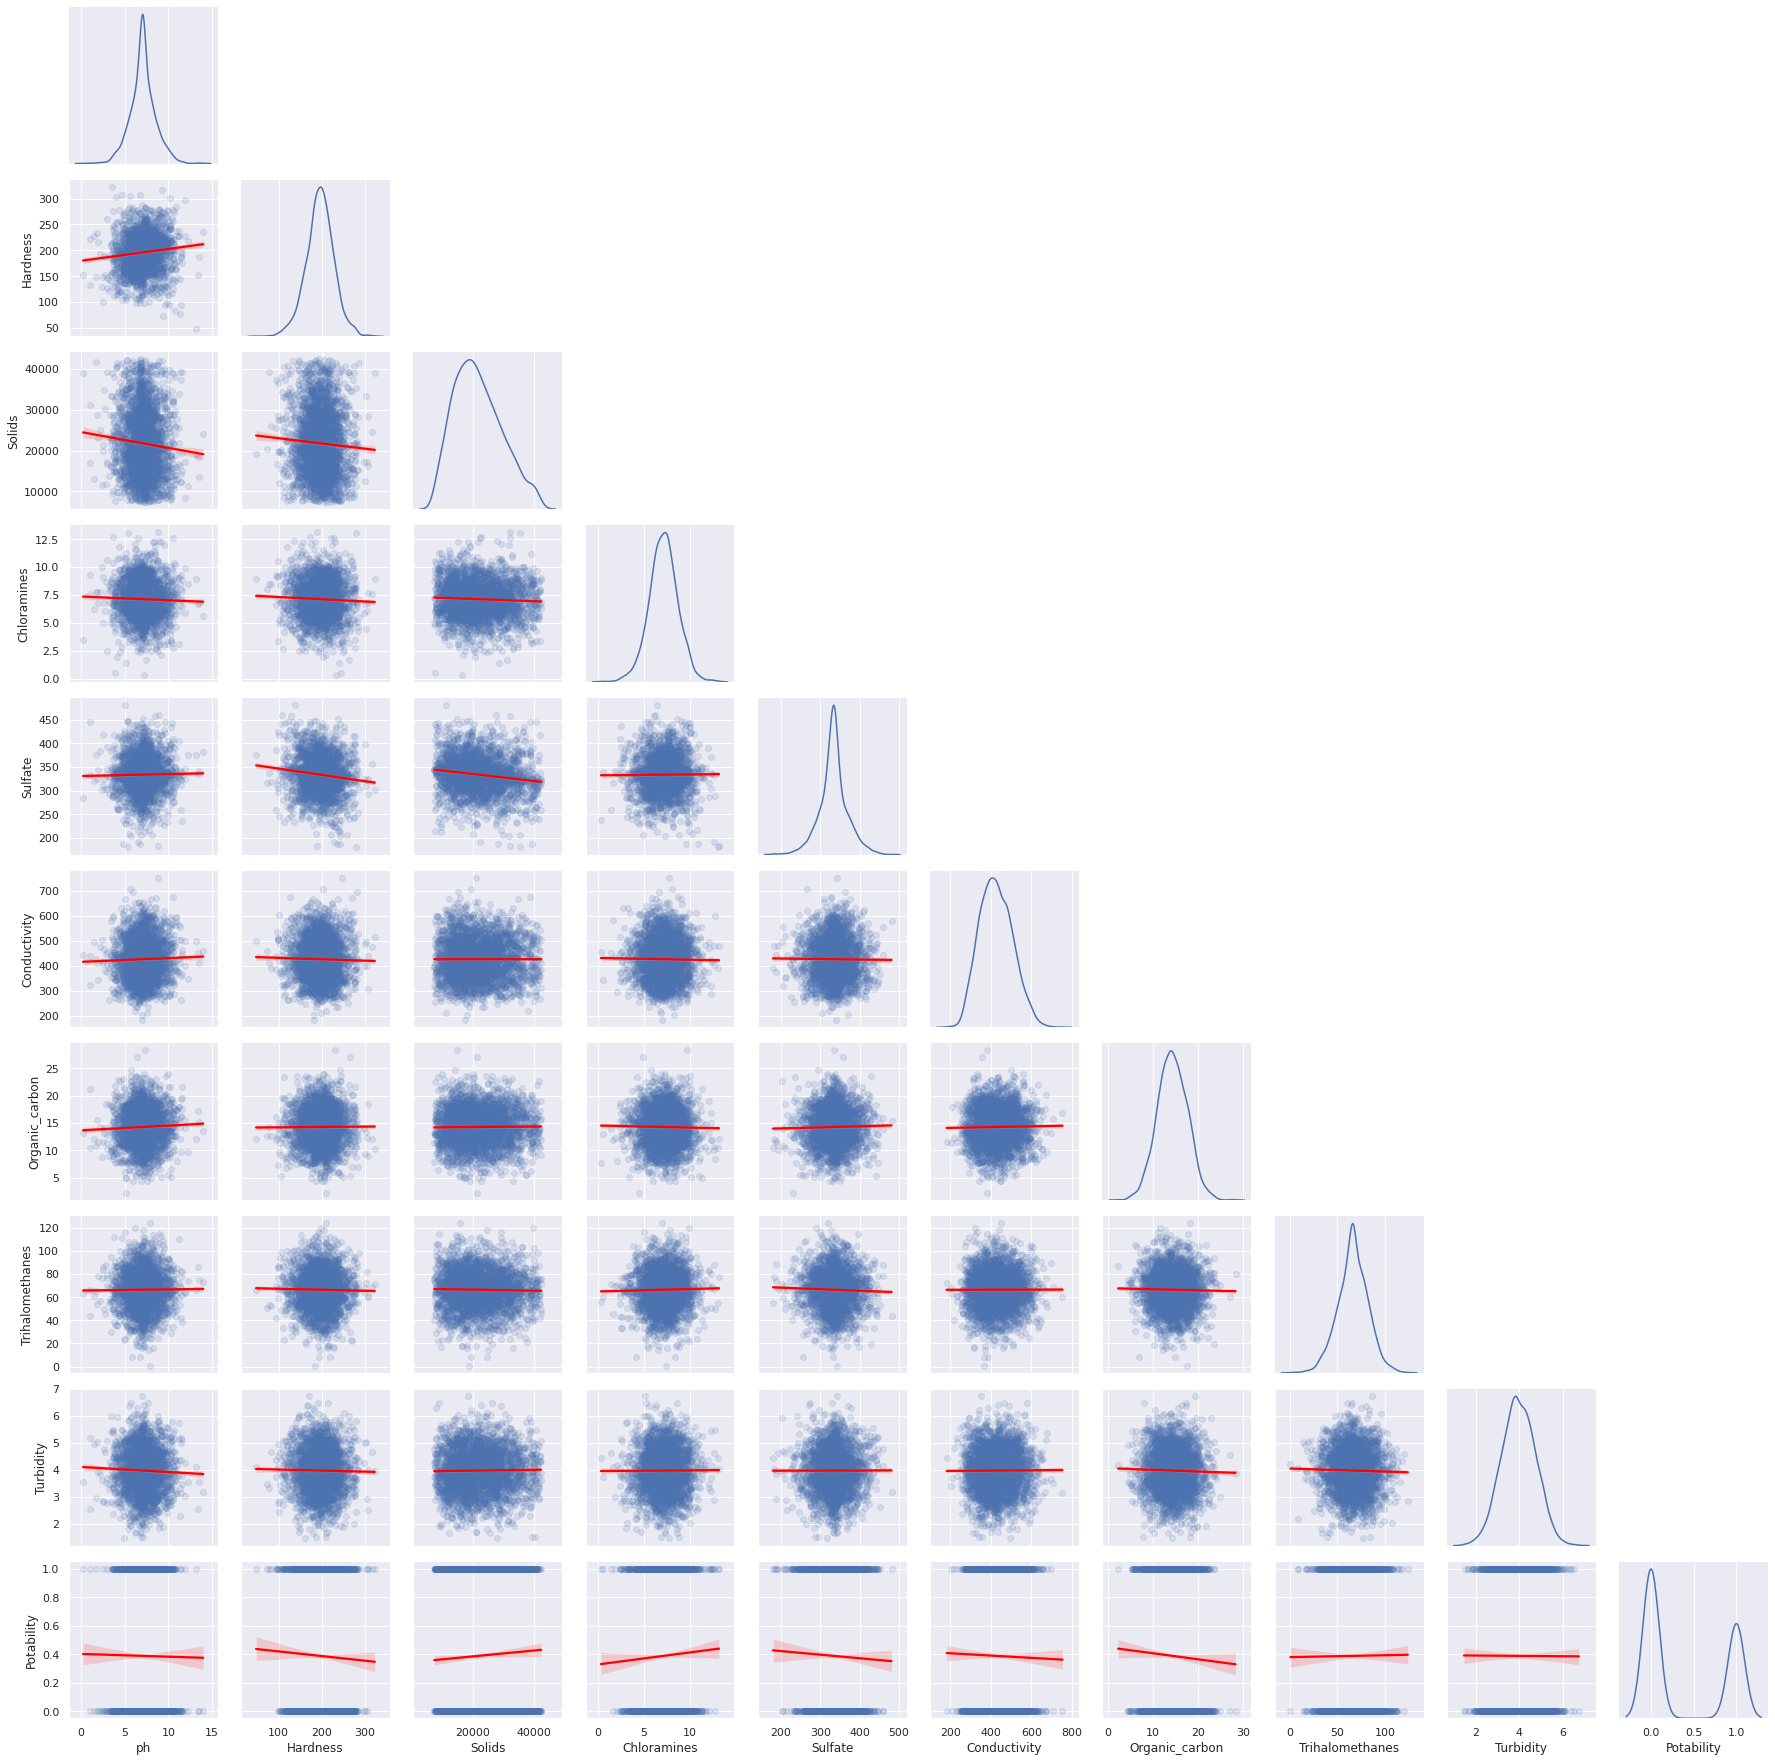

In [16]:
#creating a unique plot with the regressions
g = sns.PairGrid(df_imputed,diag_sharey=False, corner=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})
g.map_diag(sns.kdeplot)
plt.show()

Every features follow a bell distribution but we have confirmation that there aren't strong linear correlations. 

<a id="10"> </a>
#### 2.5. T-test water quality

There is little difference between mean values for Potable and Not Potable water. 
Are they significantly different?

In [17]:
df_imputed.groupby('Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0.0,7.093155,196.549430,21586.062367,7.088965,334.343552,427.081229,14.354707,66.386849,3.971189
1.0,7.076035,195.123853,22109.547500,7.175724,333.014879,424.893454,14.159437,66.528325,3.967991


I use t-test to check if the mean values of Potable and Not Potable water are significantly different.<br>
Null Hypothesis: There is no significant difference between the two means.<br>
Alternative Hypothesis: There is difference between the two means.<br>

In [18]:
#t-test for each variable
not_pot = df_imputed.Potability == 0
pot = df_imputed.Potability == 1
variable1 = df_imputed.ph
variable2 = df_imputed.Hardness
variable3 = df_imputed.Solids
variable4 = df_imputed.Chloramines
variable5 = df_imputed.Sulfate
variable6 = df_imputed.Conductivity
variable7 = df_imputed.Organic_carbon
variable8 = df_imputed.Trihalomethanes
variable9 = df_imputed.Turbidity

from scipy import stats
t_value1,p_value1=stats.ttest_ind(variable1[not_pot], variable1[pot], axis=0, equal_var=False)
t_value2,p_value2=stats.ttest_ind(variable2[not_pot], variable2[pot], axis=0, equal_var=False)
t_value3,p_value3=stats.ttest_ind(variable3[not_pot], variable3[pot], axis=0, equal_var=False)
t_value4,p_value4=stats.ttest_ind(variable4[not_pot], variable4[pot], axis=0, equal_var=False)
t_value5,p_value5=stats.ttest_ind(variable5[not_pot], variable5[pot], axis=0, equal_var=False)
t_value6,p_value6=stats.ttest_ind(variable6[not_pot], variable6[pot], axis=0, equal_var=False)
t_value7,p_value7=stats.ttest_ind(variable7[not_pot], variable7[pot], axis=0, equal_var=False)
t_value8,p_value8=stats.ttest_ind(variable8[not_pot], variable8[pot], axis=0, equal_var=False)
t_value9,p_value9=stats.ttest_ind(variable9[not_pot], variable9[pot], axis=0, equal_var=False)


print('pH: t statistic %0.3f p-value %0.3f' %(t_value1, p_value1))
print('Hardness: t statistic %0.3f p-value %0.3f' %(t_value2, p_value2))
print('Solids: t statistic %0.3f p-value %0.3f' %(t_value3, p_value3))
print('Chloramines: t statistic %0.3f p-value %0.3f' %(t_value4, p_value4))
print('Sulfate: t statistic %0.3f p-value %0.3f' %(t_value5, p_value5))
print('Conductivity: t statistic %0.3f p-value %0.3f' %(t_value6, p_value6))
print('Organic_carbon: t statistic %0.3f p-value %0.3f' %(t_value7, p_value7))
print('Trihalomethanes: t statistic %0.3f p-value %0.3f' %(t_value8, p_value8))
print('Turbidity: t statistic %0.3f p-value %0.3f' %(t_value9, p_value9))

pH: t statistic 0.331 p-value 0.740
Hardness: t statistic 1.170 p-value 0.242
Solids: t statistic -1.823 p-value 0.068
Chloramines: t statistic -1.473 p-value 0.141
Sulfate: t statistic 0.965 p-value 0.335
Conductivity: t statistic 0.738 p-value 0.461
Organic_carbon: t statistic 1.604 p-value 0.109
Trihalomethanes: t statistic -0.243 p-value 0.808
Turbidity: t statistic 0.111 p-value 0.912


The p-values for each variable are more than 0.05. The null hypothesis is accepted. There is no significant difference between the means of the Potable and Not Potable Water.<br>
This is an interesting result because Potable water should have significantly different qualities compared to non-potable water. However, the means are very similar.<br>
There are few informations on how the water sample is classified as potable or not potable, there might be some error in the classification. According to WHO, the acceptable pH range for potable water is pH 6.5 - 8.5. In the data,there were water samples (for example rows 3267, 3269 and 3273, see below) with pH outside of this range but are considered as potable water.
There three types of water quality parameters - physical, chemical, and biological. This dataset presents some physical and chemical parameters. Probably it is incomplete to predict the quality of water based only on these parameters.

In [19]:
df_imputed.tail(8)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1.0
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1.0
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1.0
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609807,392.449580,19.903225,66.475179,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847013,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992265,402.883113,11.168946,77.488213,4.708658,1.0
3275,7.874671,195.102299,17404.177061,7.509306,338.023771,327.459760,16.140368,78.698446,2.309149,1.0


<a id="11"> </a>
#### 2.6. Preprocessing: Scaling, Rebalancing and Features selection

First of all I divide the dataset in "train" and "test" set

In [20]:
#features
X = df_imputed.drop("Potability", axis=1)

#label
# y = df.iloc[:,-1]
y = df_imputed.loc[:, "Potability"]

* Scaling the features:

In [21]:
#loading all the sklearn modules I need

#data preparation:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split

import warnings
warnings.filterwarnings("ignore")


#splitting
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= 0)
print(X_train.shape)
print(y_train.shape)

#normalizing features
scaler = StandardScaler() #calling the scaler 
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(2488, 9)
(2488,)


In order to overcoming class imbalance I use an hybrid technique: SMOTE(Synthetic Minority Oversampling technique) + Tomek Links(undersampling technique). I apply this technique only on the training set in order to preserve the test set for evaluation.<br>
SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links. <br>
Therefore, to avoid overfitting, I'm not doing oversample before cross validation but I'll try using the imblearn pipeline class such that I can upsample as part of the cross validation

It's the moment of  features selection.<br>
I start with the Mutual information method

In [22]:
#loading all the sklearn modules I need
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

#mutual information selecting all features
mutual = SelectKBest(score_func=mutual_info_classif, k='all')

#learn relationship from training data
mutual.fit(X_train, y_train)

# transform train input data
X_train_mut = mutual.transform(X_train)

# transform test input data
X_test_mut = mutual.transform(X_test)

#printing scores of the features
for i in range(len(mutual.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.001433
Feature 1: 0.003262
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.003382
Feature 5: 0.029750
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000455


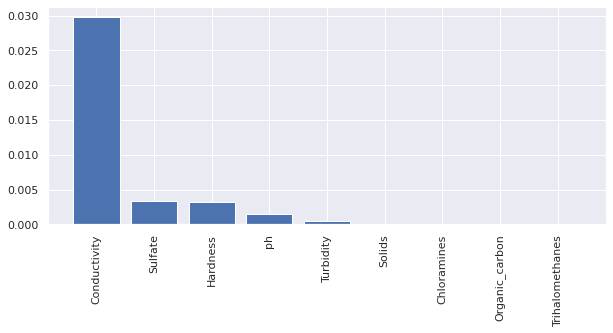

In [23]:
# I create a df with the test scores
mutual_score = pd.DataFrame(mutual.scores_, index=df_imputed.drop(columns=["Potability"]).columns, columns=["Mutual_Score"])
mutual_score = mutual_score.sort_values(by="Mutual_Score", ascending=False)

# I visualise with a bar graph which features are most influential
sns.set()
plt.figure(figsize=(10, 4))
plt.bar(x=mutual_score.index, height=mutual_score["Mutual_Score"])
plt.xticks(rotation=90)
plt.show()


Now I try ANOVA f-test

In [24]:
# configure to select all features
an = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
an.fit(X_train, y_train)

# transform train input data
X_train_an = an.transform(X_train)

# transform test input data
X_test_an = an.transform(X_test)

#printing scores of the features
for i in range(len(an.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.001433
Feature 1: 0.003262
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.003382
Feature 5: 0.029750
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000455


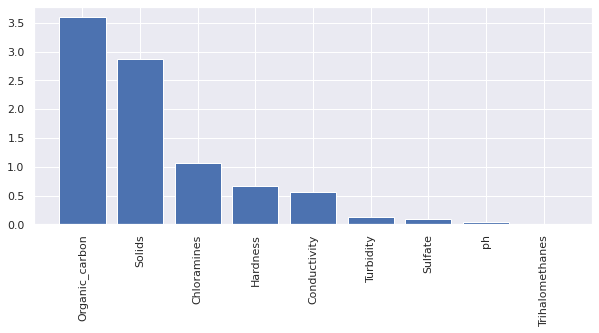

In [25]:
# I create a df with the test scores
an_score = pd.DataFrame(an.scores_, index=df_imputed.drop(columns=["Potability"]).columns, columns=["Anova_Score"])
an_score = an_score.sort_values(by="Anova_Score", ascending=False)

# I visualise with a bar graph which features are most influential
sns.set()
plt.figure(figsize=(10, 4))
plt.bar(x=an_score.index, height=an_score["Anova_Score"])
plt.xticks(rotation=90)
plt.show()

The results obtained in terms of the importance of the features are very different between the two methods for a very simple reason: Anova f-test is able to 'feel' the linear dependence between the features, while the mutual information 'feels' any type of dependence, in particular it 'feels' the non-linear ones.<br>
Considering the results obtained with the correlation matrix, coherently, the mutual information indicates better than Anova f-test which are the features that really matter for this type of problem

<a id="12"> </a>
#### 2.7. Choose of proper metric

Accuracy will not give me the confidence that I have developed a good model (and this is true in general: accuracy alone is not enough), so I have to find other metrics to evaluate it.<br>
Other metrics I'm going to use will be:<br>
Precision and recall curve<br>
AUC ROC curve <br>

<a id="13"> </a>
### 3. Machine Learning: creation of the predictive model

I now try two different ways. The road I call 1 consists of using all available features, while the road I call 2 consists of selecting the features (3 or 4) that proved to be most relevant according to the Mutual Information

<a id="14"> </a>
#### 3.1. Method 1: spot check using all features for  the predictions

Spot checking is a great method to find out the baseline models for our data. It's quite easy and takes really less time.<br>
I perform a spot check with StratifiedKFold . The models to be spotted will be: Logistic Regression, Random Forest Classifier, KNN and SVC.<br>
I decide to use only one evaluation metric at this stage; for simplicity, I choose accuracy. I will then use the other metrics chosen before for evaluating the performance of the models.

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models =[("LR", LogisticRegression(max_iter=1000, random_state=0)),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ('RF',RandomForestClassifier(random_state=0)), ("SVC", SVC())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('SVC', 0.6655948553054662),
 ('RF', 0.6607717041800643),
 ('KNN', 0.6366559485530546),
 ('LR', 0.612540192926045)]

I chose the first 2 baseline models and performed Hyperparameter tuning to them.

<a id="15"> </a>
#### 3.1.1. Hyperparameters tuning

#### Random Forest Classifier

In [27]:
from imblearn.combine import SMOTETomek 
from sklearn.model_selection import StratifiedKFold #stratification
from sklearn.model_selection import GridSearchCV #for validating hyperparameters
from imblearn.pipeline import Pipeline as imbpipeline
model_rf = RandomForestClassifier(random_state=0)
pipeline = imbpipeline(steps = [['smotetomek', SMOTETomek(random_state=0, n_jobs=-1)],
                                ['rf', model_rf]])

crossval = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

#preparing parameter values to be validated    
rf_params = [{"rf__n_estimators": [10,100, 1000],"rf__max_features":['sqrt', 'log2'], "rf__criterion":['gini', 'entropy'], "rf__max_depth":[11,21,51]}]

rf_grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=rf_params,
                           scoring='accuracy',
                           cv=crossval, verbose=1,
                           n_jobs=-1)

rf_grid_search.fit(X_train, y_train)
print("Best score: {}, and best hyperparameters: {}".format(rf_grid_search.best_score_, rf_grid_search.best_params_ ))

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best score: 0.655144694533762, and best hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 51, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}


I evaluate the performance of Random Forest with the best hyperparameters found above:

In [28]:
#predictions and model accuracy
y_test_pred_rf = rf_grid_search.best_estimator_.predict(X_test)
y_train_pred_rf = rf_grid_search.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred_rf),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred_rf),2)))

Model accuracy on test set: 0.63
Model accuracy on training set: 0.97


Now the classification  report

In [29]:
from sklearn.metrics import classification_report
target_names = ['Not Potable', 'Potable']
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

 Not Potable       0.69      0.71      0.70       381
     Potable       0.53      0.51      0.52       241

    accuracy                           0.63       622
   macro avg       0.61      0.61      0.61       622
weighted avg       0.63      0.63      0.63       622



The Not Potable class is better predicted than Potable class. <br>
Precision is the ratio between the True Positives and all the Positives <br>
The recall is the measure of our model correctly identifying True Positives <br>
Later we could plot the precision-recall trade-off (precion-recall curve PRC). <br>

In [30]:
#creating list with the resuls of the model
tab = []
    
tab.append([rf_grid_search.estimator,accuracy_score(y_train, y_train_pred_rf), " --- ",
                               accuracy_score(y_test, y_test_pred_rf)])

#### SVC

In [31]:
model_svc = SVC(probability=True)
pipeline = imbpipeline(steps = [['smotetomek', SMOTETomek(random_state=0, n_jobs=-1)],
                                ['SVC', model_svc]])

crossval = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)
    
#preparing parameter values to be validated
svc_params = [
               {"SVC__kernel": ["linear"], "SVC__C": [ 0.1, 1, 10,]},
               {"SVC__kernel": ["rbf"], "SVC__C": [0.01, 0.1, 1, 10, 100], "SVC__gamma": [0.01, 0.1, 1, 10, 100]},
               {"SVC__kernel": ["poly"], "SVC__C": [0.01, 0.1, 1, 10], "SVC__degree": np.arange(1,5,1)}
              ]

svc_grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=svc_params,
                           scoring='accuracy',
                           cv=crossval, verbose=1,
                           n_jobs=-1)

svc_grid_search.fit(X_train, y_train)
print("Best score: {}, and best hyperparameters: {}".format(svc_grid_search.best_score_, svc_grid_search.best_params_ ))

Fitting 8 folds for each of 44 candidates, totalling 352 fits
Best score: 0.665192926045016, and best hyperparameters: {'SVC__C': 0.1, 'SVC__degree': 4, 'SVC__kernel': 'poly'}


I evaluate the performance of SVC with the best hyperparameters found above:

In [32]:
#predictions and model accuracy
y_test_pred_svc = svc_grid_search.best_estimator_.predict(X_test)
y_train_pred_svc = svc_grid_search.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred_svc),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred_svc),2)))

Model accuracy on test set: 0.65
Model accuracy on training set: 0.72


Now the classification  report

In [33]:
target_names = ['Not Potable', 'Potable']
print(classification_report(y_test, y_test_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

 Not Potable       0.66      0.87      0.76       381
     Potable       0.60      0.30      0.40       241

    accuracy                           0.65       622
   macro avg       0.63      0.59      0.58       622
weighted avg       0.64      0.65      0.62       622



Also in this case the Not Potable class is better predicted than Potable class.<br>
Besides, we can notice that recall value for the first class is much higher than the second one

In [34]:
#creating list with the resuls of the second model
tab.append([svc_grid_search.estimator,accuracy_score(y_train, y_train_pred_svc), " --- ",
                                accuracy_score(y_test, y_test_pred_svc)])

#creating dataframe in order to compare the models    
models_table = pd.DataFrame(tab, columns=["model", "accuracy_train", 
                                   " --- ", "accuracy_test",])
models_table

,model,accuracy_train,---,accuracy_test
0,"(SMOTETomek(n_jobs=-1, random_state=0), Random...",0.967444,---,0.631833
1,"(SMOTETomek(n_jobs=-1, random_state=0), SVC(pr...",0.719051,---,0.652733


RF sensationally overfitted, in fact it correctly predicts 97% of values in the train set but gets more values in the test set wrong.<br>
SVC overfitted a little (test results are lower than train results) but scored well with a greater performance than RF on the test set

Now we take a look at the Precision-Recall curve. As the name suggests, this curve is a direct representation of the precision(y-axis) and the recall(x-axis). If you observe our definitions  for the Precision and Recall above, you will notice that at no point are we using the True Negatives.<br>
We plot the precision and recall for different threshold values:

In [35]:
#predict probabilities
pred_prob1 = rf_grid_search.predict_proba(X_test)
pred_prob2 = svc_grid_search.predict_proba(X_test)

from sklearn.metrics import precision_recall_curve
#prcision-recall curve models
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred_prob1[:,1])
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred_prob2[:,1])

In [36]:
from sklearn import metrics
# calculate precision-recall AUC
auc_prc1 = metrics.auc(recall1, precision1)
auc_prc2 = metrics.auc(recall2, precision2)
print("RF AUC PRC score:{}, SVC AUC PRC score:{}".format(auc_prc1, auc_prc2))

RF AUC PRC score:0.5553085016464516, SVC AUC PRC score:0.5701615480204362


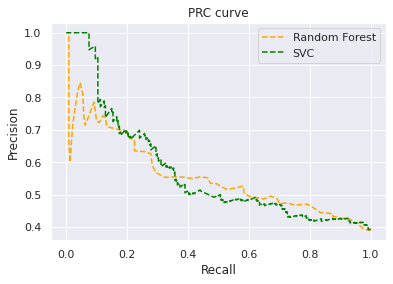

In [37]:
#plot PRC curves
plt.plot(recall1, precision1, linestyle='--', color='orange', label='Random Forest')
plt.plot(recall2, precision2, linestyle='--', color='green', label='SVC')
plt.title('PRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

PRC Interpretation:<br>
- At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model makes no distinctions between Potable and Not Potable class.<br>
- At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means that both our precision and recall are high and the model makes distinctions perfectly.<br>
- The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.<br>
- Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1. Therefore, we should aim for a high value of AUC. 

We get a AUC PRC of around 56% for both models.  Also, the models can achieve high precision with recall as 0 and would achieve a high recall by compromising the precision of 50%.<br> Besides, the performance of the models aren't so great but the score of AUC PRC for SVC is a little better.
Now we take a look at the AUC-ROC curve too.<br>
ROC Curves(Receiver Operating Characteristic Curve):
It is the plot between the TPR(y-axis) and FPR(x-axis). Since our model classifies the sample as Potable or not based on the probabilities generated for each class, we can decide the threshold of the probabilities as well.<br>
For example, we want to set a threshold value of 0.4. This means that the model will classify the datapoint/sample as Potable if the probability of the sample potable is greater than 0.4. This will obviously give a high recall value and reduce the number of False Positives. Similarly, we can visualize how our model performs for different threshold values using the ROC curve.<br>
In other words, it is a probability curve that plots the TPR and FPR at various treshold values and essentially separates the 'signal' from the 'noise'.<br>
The AUC (Area Under the Curve) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the roc curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. <br>
Let us generate a ROC curve for our model.

In [38]:
#predict probabilities
pred_prob1 = rf_grid_search.predict_proba(X_test)
pred_prob2 = svc_grid_search.predict_proba(X_test)

from sklearn.metrics import roc_curve
#roc curve models
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
#roc curve for tpr=fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test,random_probs, pos_label=1)

In [39]:
from sklearn.metrics import roc_auc_score
#auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print("RF AUC ROC score:{}, SVC AUC ROC score:{}".format(auc_score1, auc_score2))

RF AUC ROC score:0.6616623648185055, SVC AUC ROC score:0.640528855054944


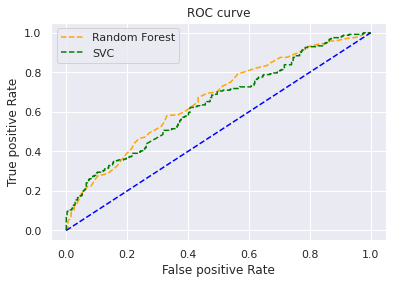

In [40]:
#plot the ROC curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='best')
plt.show()

AUC for Random Forest ROC curve is slightly higher than that for SVC ROC curve. Therefore, we can say that RF did a better job of classifying the positive class in the data set. The diagonal line is a random model with an AUC of 0.5, a model with no skill, which just the same as making a random prediction

<a id="16"> </a>
#### 3.2. Method 2: spot check using the most relevant features for  the predictions

As previously indicated, I refer to the results obtained with the mutual information to understand which are the most important features. From the graph above, I choose the first 4 features of the graph itself:<br>
-- Conductivity<br>
-- Sulfate<br>
-- Hardness<br>
-- pH<br>
I create a sub-dataframe with just these features and analyze it:

In [41]:
#df 'reducted'
df_red = df_imputed[[ 'Conductivity','Sulfate', 
                 'Hardness', 'ph', 'Potability']]

#showing head
df_red.head()

,Conductivity,Sulfate,Hardness,ph,Potability
0,564.308654,368.516441,204.890455,7.190926,0.0
1,592.885359,344.837030,129.422921,3.716080,0.0
2,418.606213,331.983226,224.236259,8.099124,0.0
3,363.266516,356.886136,214.373394,8.316766,0.0
4,398.410813,310.135738,181.101509,9.092223,0.0


I have to redefine X and y and split the dataset:

In [42]:
#features
X = df_red.drop("Potability", axis=1)

#label
# y = df.iloc[:,-1]
y = df_red.loc[:, "Potability"]

In [43]:
#splitting
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state= 0)
print(X_train.shape)
print(y_train.shape)

#normalizing features
scaler = StandardScaler() #calling the scaler 
#fitting the features to scale them
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(2488, 4)
(2488,)


I do the spot check of the 3 models to select the best 2, as done before.

In [44]:
models =[("LR", LogisticRegression(max_iter=1000, random_state=0)),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ('RF',RandomForestClassifier(random_state=0)), ("SVC", SVC())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('RF', 0.657556270096463),
 ('SVC', 0.6495176848874598),
 ('KNN', 0.6286173633440515),
 ('LR', 0.612540192926045)]

Firt of all I notice that the results are very similar to the spot-check with all features, showing that mutual information really discovers the most important columns.<br> 
Also in this case I chose the RF and SVC models and performed Hyperparameter tuning to them.

<a id="17"> </a>
#### 3.2.1. Hyperparameters tuning

#### Random Forest Classifier

In [45]:
model_rf = RandomForestClassifier(random_state=0)
pipeline = imbpipeline(steps = [['smotetomek', SMOTETomek(random_state=0, n_jobs=-1)],
                                ['rf', model_rf]])

crossval = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

#preparing parameter values to be validated    
rf_params = [{"rf__n_estimators": [10,100, 1000],"rf__max_features":['sqrt', 'log2'], "rf__criterion":['gini', 'entropy'], "rf__max_depth":[11,21,51]}]

rf_grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=rf_params,
                           scoring='accuracy',
                           cv=crossval, verbose=1,
                           n_jobs=-1)

rf_grid_search.fit(X_train, y_train)
print("Best score: {}, and best hyperparameters: {}".format(rf_grid_search.best_score_, rf_grid_search.best_params_ ))

Fitting 8 folds for each of 36 candidates, totalling 288 fits
Best score: 0.6370578778135048, and best hyperparameters: {'rf__criterion': 'entropy', 'rf__max_depth': 11, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}


I evaluate the performance of Random Forest with the best hyperparameters found above:

In [46]:
#predictions and model accuracy
y_test_pred_rf = rf_grid_search.best_estimator_.predict(X_test)
y_train_pred_rf = rf_grid_search.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred_rf),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred_rf),2)))

Model accuracy on test set: 0.62
Model accuracy on training set: 0.84


Now the classification  report

In [47]:
target_names = ['Not Potable', 'Potable']
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))

              precision    recall  f1-score   support

 Not Potable       0.68      0.70      0.69       381
     Potable       0.51      0.49      0.50       241

    accuracy                           0.62       622
   macro avg       0.60      0.59      0.60       622
weighted avg       0.62      0.62      0.62       622



The Not Potable class is better predicted than Potable class again.

In [48]:
#creating list with the resuls of the model
tab = []
    
tab.append([rf_grid_search.estimator,accuracy_score(y_train, y_train_pred_rf), " --- ",
                               accuracy_score(y_test, y_test_pred_rf)])

#### SVC

In [49]:
model_svc = SVC(probability=True)
pipeline = imbpipeline(steps = [['smotetomek', SMOTETomek(random_state=0, n_jobs=-1)],
                                ['SVC', model_svc]])

crossval = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)
    
#preparing parameter values to be validated
svc_params = [
               {"SVC__kernel": ["linear"], "SVC__C": [ 0.1, 1, 10,]},
               {"SVC__kernel": ["rbf"], "SVC__C": [0.01, 0.1, 1, 10, 100], "SVC__gamma": [0.01, 0.1, 1, 10, 100]},
               {"SVC__kernel": ["poly"], "SVC__C": [0.01, 0.1, 1, 10], "SVC__degree": np.arange(1,5,1)}
              ]

svc_grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=svc_params,
                           scoring='accuracy',
                           cv=crossval, verbose=1,
                           n_jobs=-1)

svc_grid_search.fit(X_train, y_train)
print("Best score: {}, and best hyperparameters: {}".format(svc_grid_search.best_score_, svc_grid_search.best_params_ ))

Fitting 8 folds for each of 44 candidates, totalling 352 fits
Best score: 0.6555466237942122, and best hyperparameters: {'SVC__C': 10, 'SVC__gamma': 0.01, 'SVC__kernel': 'rbf'}


I evaluate the performance of SVC with the best hyperparameters found above:

In [50]:
#predictions and model accuracy
y_test_pred_svc = svc_grid_search.best_estimator_.predict(X_test)
y_train_pred_svc = svc_grid_search.best_estimator_.predict(X_train)


#accuracy
print('Model accuracy on test set: {}'.format(round(accuracy_score(y_test, y_test_pred_svc),2)))
print('Model accuracy on training set: {}'.format(round(accuracy_score(y_train, y_train_pred_svc),2)))

Model accuracy on test set: 0.64
Model accuracy on training set: 0.66


Classification report

In [51]:
target_names = ['Not Potable', 'Potable']
print(classification_report(y_test, y_test_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

 Not Potable       0.66      0.83      0.74       381
     Potable       0.56      0.33      0.41       241

    accuracy                           0.64       622
   macro avg       0.61      0.58      0.58       622
weighted avg       0.62      0.64      0.61       622



Also in this case the Not Potable class is better predicted than Potable class.<br>
Besides, we can notice again that recall value for the first class is much higher than the second one

In [52]:
#creating list with the resuls of the second model
tab.append([svc_grid_search.estimator,accuracy_score(y_train, y_train_pred_svc), " --- ",
                                accuracy_score(y_test, y_test_pred_svc)])

#creating dataframe in order to compare the models    
models_table = pd.DataFrame(tab, columns=["model", "accuracy_train", 
                                   " --- ", "accuracy_test",])
models_table

,model,accuracy_train,---,accuracy_test
0,"(SMOTETomek(n_jobs=-1, random_state=0), Random...",0.838826,---,0.617363
1,"(SMOTETomek(n_jobs=-1, random_state=0), SVC(pr...",0.658360,---,0.638264


The results are very closer to previously and this means that fearures selection is working good.<br>
RF overfitted again, in fact it correctly predicts 84% of values in the train set but gets more values in the test set wrong <br>
SVC scored well with a greater performance than RF on the test set

Now we take a look at the PRC curve and AUC-ROC curve

In [53]:
#predict probabilities
pred_prob1 = rf_grid_search.predict_proba(X_test)
pred_prob2 = svc_grid_search.predict_proba(X_test)

#prcision-recall curve models
precision1, recall1, thresholds1 = precision_recall_curve(y_test, pred_prob1[:,1])
precision2, recall2, thresholds2 = precision_recall_curve(y_test, pred_prob2[:,1])

In [54]:
# calculate precision-recall AUC
auc_prc1 = metrics.auc(recall1, precision1)
auc_prc2 = metrics.auc(recall2, precision2)
print("RF AUC PRC score:{}, SVC AUC PRC score:{}".format(auc_prc1, auc_prc2))

RF AUC PRC score:0.5232992633615897, SVC AUC PRC score:0.53182133379325


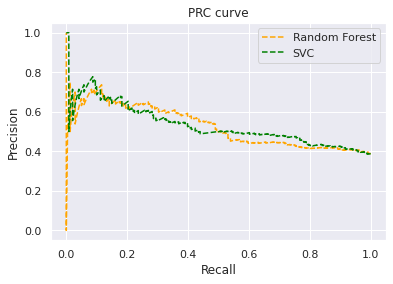

In [55]:
#plot the ROC curves
#plot PRC curves
plt.plot(recall1, precision1, linestyle='--', color='orange', label='Random Forest')
plt.plot(recall2, precision2, linestyle='--', color='green', label='SVC')
plt.title('PRC curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

We get a AUC PRC of around 53% ( very similar for both models).  Also, the models can achieve high precision with recall as 0 and would achieve a high recall by compromising the precision of 50%.<br> Besides, the performance of the models are only just a bit smaller than previously with all features.

In [56]:
#predict probabilities
pred_prob1 = rf_grid_search.predict_proba(X_test)
pred_prob2 = svc_grid_search.predict_proba(X_test)


#roc curve models
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
#roc curve for tpr=fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test,random_probs, pos_label=1)

In [57]:
#auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print("RF AUC ROC score:{}, SVC AUC ROC score:{}".format(auc_score1, auc_score2))

RF AUC ROC score:0.626534235087834, SVC AUC ROC score:0.6424020648871174


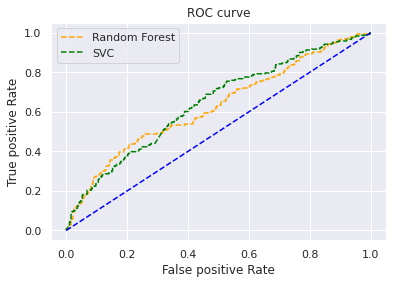

In [58]:
#plot the ROC curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='SVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='best')
plt.show()

The two AUC-ROC tend to overlap. Infact the AUC ROC score are very similar( again SVC AUC score is slightly better). So, in this case, the models almost did the same job of classifying the positive class in the data set

<a id="18"> </a>
### 4. Conclusions: Choice of the model

I believe the features aren't proving much help to the model to distinguish between the 2 classes which is stopping the model to perform better.<br> That is why I think the safest thing would be to collect more data.<br>
However, based on the analysis conducted, the best solution might be to use the SVC model by selecting only the most important features